In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
large = pd.read_csv('/Users/flatironschool/Absenteeism_Project/data/processed/large_schools.csv')

In [3]:
large.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,STNAM,LEANM,NCESSCH,SCHNAM,ALL_COHORT_1516,ALL_RATE_1516,LEA_STATE,...,sports_part,sports_rate,total_suspension_days,suspensed_day_rate,harassed,harassed_rate,activities_funds_rate,non_cert_rate,counselor_rate,absent_teacher_rate
0,5,5,5,ALABAMA,Hoover City,10000700251,Hoover High Sch,714,92,AL,...,898.0,0.302663,160.0,0.053927,1.0,0.000337,434.833734,0.019066,0.001685,0.333651
1,7,7,7,ALABAMA,Hoover City,10000701456,Spain Park High Sch,412,94,AL,...,526.0,0.313655,232.0,0.138342,0.0,0.000000,511.925343,0.016920,0.001789,0.346870
2,8,8,8,ALABAMA,Madison City,10000800831,Bob Jones High Sch,451,97,AL,...,565.0,0.321754,72.0,0.041002,2.0,0.001139,72676.817158,0.000000,0.002278,0.019608
3,9,9,9,ALABAMA,Madison City,10000802198,James Clemens High School,404,96,AL,...,280.0,0.163934,134.0,0.078454,0.0,0.000000,3478.029292,0.000000,0.002635,0.232804
4,12,12,12,ALABAMA,Trussville City,10001301682,Hewitt-Trussville High Sch,381,96,AL,...,799.0,0.554476,28.0,0.019431,2.0,0.001388,3970.929743,0.000000,0.002082,0.231027


## Imputing Mean for Missing Values

In [107]:
#impute mean for numerical vars
large_feat = large[['ALL_RATE_1516', 'total_enrollment', 'ap_ib_de_rate', 'sat_act_rate', 'pass_algebra_rate',
      'geometry_rate', 'algebra2_rate', 'calc_rate', 'chronic_absent_rate', 'activities_funds_rate',
      'sports_rate', 'suspensed_day_rate', 'harassed_rate',
      'non_cert_rate','counselor_rate','absent_teacher_rate']]

In [108]:
imputed_numeric_df = large_feat
for i in range(0, len(large_feat.columns)):
    print('im here:', large_feat.columns[i])
    imputed_numeric_df.iloc[:,i].replace(np.NaN, imputed_numeric_df.iloc[:,i].mean(), inplace=True)

im here: ALL_RATE_1516
im here: total_enrollment
im here: ap_ib_de_rate
im here: sat_act_rate
im here: pass_algebra_rate
im here: geometry_rate
im here: algebra2_rate
im here: calc_rate
im here: chronic_absent_rate
im here: activities_funds_rate
im here: sports_rate
im here: suspensed_day_rate
im here: harassed_rate
im here: non_cert_rate
im here: counselor_rate
im here: absent_teacher_rate


In [109]:
#No missing values
imputed_numeric_df.isna().sum()

ALL_RATE_1516            0
total_enrollment         0
ap_ib_de_rate            0
sat_act_rate             0
pass_algebra_rate        0
geometry_rate            0
algebra2_rate            0
calc_rate                0
chronic_absent_rate      0
activities_funds_rate    0
sports_rate              0
suspensed_day_rate       0
harassed_rate            0
non_cert_rate            0
counselor_rate           0
absent_teacher_rate      0
dtype: int64

In [145]:
imputed_numeric_df.head()

,ALL_RATE_1516,total_enrollment,ap_ib_de_rate,sat_act_rate,pass_algebra_rate,geometry_rate,algebra2_rate,calc_rate,chronic_absent_rate,activities_funds_rate,sports_rate,suspensed_day_rate,harassed_rate,non_cert_rate,counselor_rate,absent_teacher_rate
0,92,2967.0,0.228851,0.416245,0.1866,0.242332,0.056623,0.065723,0.144253,434.833734,0.302663,0.053927,0.000337,0.019066,0.001685,0.333651
1,94,1677.0,0.409884,0.288014,0.1866,0.269529,0.045915,0.064997,0.171139,511.925343,0.313655,0.138342,0.000000,0.016920,0.001789,0.346870
2,97,1756.0,0.409884,0.396925,0.1866,0.126424,0.034169,0.068337,0.009112,72676.817158,0.321754,0.041002,0.001139,0.000000,0.002278,0.019608
3,96,1708.0,0.409884,0.340749,0.1866,0.108314,0.014637,0.045667,0.103630,3478.029292,0.163934,0.078454,0.000000,0.000000,0.002635,0.232804
4,96,1441.0,0.409884,0.084663,0.1866,0.203331,0.160305,0.045802,0.104788,3970.929743,0.554476,0.019431,0.001388,0.000000,0.002082,0.231027


## Model 1 - Using statsmodel

In [110]:
y = large['ALL_RATE_1516']

In [111]:
#features to use for prediction came from 
X = imputed_numeric_df

In [112]:
import statsmodels.api as sm

#Regression Model
X = sm.add_constant(X)# adding a constant
model=sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ALL_RATE_1516   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.636e+28
Date:                Fri, 19 Jul 2019   Prob (F-statistic):               0.00
Time:                        16:04:35   Log-Likelihood:             1.1088e+05
No. Observations:                4285   AIC:                        -2.217e+05
Df Residuals:                    4268   BIC:                        -2.216e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -4.6e-12   2.89e-13    -15.939      0.000   -5.17e-12   -4.03e-12
ALL_RATE_1516             1.0000   2.29e-15   4.37e+14      0.000       1.000       1.000
total_enrollment       1.287e-16   3.19e-17      4.034      0.000    6.62e-17    1.91e-16
ap_ib_de_rate          3.064e-14   3.38e-13      0.091      0.928   -6.33e-13    6.94e-13
sat_act_rate           2.389e-13   1.76e-13      1.356      0.175   -1.07e-13    5.84e-13
pass_algebra_rate      2.283e-13   4.73e-13      0.482      0.630   -6.99e-13    1.16e-12
geometry_rate         -5.906e-13   3.31e-13     -1.785      0.074   -1.24e-12    5.81e-14
algebra2_rate           9.77e-15    3.2e-13      0.031      0.976   -6.18e-13    6.37e-13
calc_rate             -1.865e-14   4.84e-13     -0.039      0.969   -9.68e-13    9.31e-13
chronic_absent_rate   -1.765e-14   1.59e-13     -0.111      0.912   -3.29e-13    2.94e-13
activities_funds_rate -1.792e-16   3.37e-18    -53.182      0.000   -1.86e-16   -1.73e-16
sports_rate           -7.105e-15   1.34e-13     -0.053      0.958    -2.7e-13    2.56e-13
suspensed_day_rate     -1.51e-14   7.21e-14     -0.209      0.834   -1.56e-13    1.26e-13
harassed_rate          4.405e-13   4.07e-12      0.108      0.914   -7.53e-12    8.41e-12
non_cert_rate         -2.753e-14   3.23e-13     -0.085      0.932   -6.61e-13    6.06e-13
counselor_rate        -2.842e-13   1.14e-11     -0.025      0.980   -2.27e-11    2.21e-11
absent_teacher_rate    2.487e-14   1.24e-13      0.200      0.841   -2.18e-13    2.68e-13
==============================================================================
Omnibus:                    11612.205   Durbin-Watson:                   1.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        477656112.112
Skew:                          32.728   Prob(JB):                         0.00
Kurtosis:                    1637.330   Cond. No.                     3.54e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.54e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [115]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

#normalize the imputed data
large_scaled = pd.DataFrame(preprocessing.scale(imputed_numeric_df),columns = imputed_numeric_df.columns) 

# PCA
pca = PCA(n_components=12)
pca.fit_transform(large_scaled)

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """


array([[-0.03903799, -1.58891607, -0.6670932 , ..., -1.23167973,
         0.99505364,  0.83678548],
       [-0.02438154, -0.85155998, -0.00907328, ..., -0.38135053,
         0.99525648, -0.44185932],
       [-1.56638967, -1.9211816 ,  2.66888978, ..., -0.60145007,
         2.19555251, -1.97325135],
       ...,
       [ 1.7590179 , -0.13590437, -0.25277698, ...,  0.44250431,
         0.0829477 , -0.0550687 ],
       [ 1.75537394,  0.03900465, -0.34180382, ..., -0.48154742,
        -0.12888693,  1.0312433 ],
       [ 0.76627668, -0.11448163,  1.14393986, ..., -0.19116985,
        -0.70380415, -0.03946169]])

In [122]:
print(sum(pca.explained_variance_ratio_[0:12]))

0.838741239351693


## Model 2 - Using sklearn linear regression on all variables

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=102)

In [125]:
lm = LinearRegression()

In [127]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [128]:
lm.coef_

array([ 0.00000000e+00,  1.00000000e+00, -9.76572559e-17, -1.70755825e-14,
        3.18756129e-14, -2.58885244e-13,  1.16692578e-12,  1.61603710e-14,
       -1.05263662e-13,  2.61545523e-14, -2.32916158e-17,  1.33778964e-14,
       -5.51561938e-14,  1.36243607e-14,  1.67935414e-16, -1.44138718e-14,
       -2.18133623e-14])

In [129]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])

In [130]:
predictions = lm.predict(X_test)

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


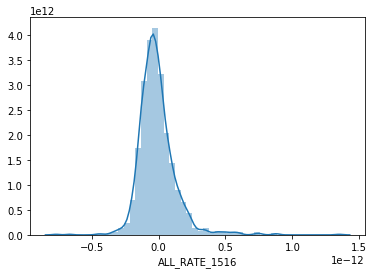

In [131]:
sns.distplot((y_test - predictions))

In [146]:
print('MAE: ', metrics.mean_absolute_error(y_test, predictions))
print('MSE: ', metrics.mean_squared_error(y_test, predictions))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R-squared: ', metrics.r2_score(y_test, predictions))

MAE:  9.792728687323493e-14
MSE:  2.0322596512621248e-26
RMSE:  1.4255734464636064e-13
R-squared:  1.0


## Model 3 - Using sklearn, reduced to four key variables

In [135]:
large_scaled_reduced = large_scaled[['non_cert_rate','sports_rate','ap_ib_de_rate', 'chronic_absent_rate']]

In [136]:
y = large['ALL_RATE_1516']
X = large_scaled_reduced

In [137]:
X_train_reduce, X_test_reduce, y_train_reduce, y_test_reduce = train_test_split(X, y, test_size=0.3, random_state=102)

In [138]:
lm = LinearRegression()

In [139]:
lm.fit(X_train_reduce, y_train_reduce)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [140]:
lm.coef_

array([-1.46178488,  1.70833397,  0.54506327, -4.37713071])

In [141]:
cdf_reduce = pd.DataFrame(lm.coef_, X_train_reduce.columns, columns=['Coeff'])

In [142]:
predictions_reduce = lm.predict(X_test_reduce)

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


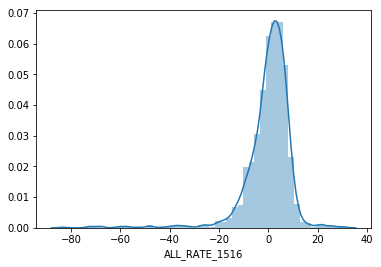

In [143]:
sns.distplot((y_test_reduce - predictions_reduce))

In [148]:
print('MAE: ', metrics.mean_absolute_error(y_test_reduce, predictions_reduce))
print('MSE: ', metrics.mean_squared_error(y_test_reduce, predictions_reduce))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test_reduce, predictions_reduce)))
print('R-squared: ', metrics.r2_score(y_test_reduce, predictions_reduce))

MAE:  6.0751544704567095
MSE:  99.39505075903959
RMSE:  9.969706653610205
R-squared:  0.15809545829350258


## Model 4 - Using sklearn on all variables with lasso

In [ ]:
# use standard scaler
# use all variables
# increase alpha to .1

In [150]:
from sklearn.linear_model import Lasso

In [ ]:
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

In [151]:
large_scaled_lasso = large_scaled[['non_cert_rate','sports_rate','ap_ib_de_rate', 'chronic_absent_rate']]

In [152]:
y = large['ALL_RATE_1516']
X = large_scaled_lasso

In [153]:
X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(X, y, test_size=0.3, random_state=102)

In [154]:
lasso = Lasso()

In [155]:
lasso.fit(X_train_lasso, y_train_lasso)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [156]:
train_score=lasso.score(X_train_lasso,y_train_lasso)
test_score=lasso.score(X_test_lasso,y_test_lasso)
coeff_used = np.sum(lasso.coef_!=0)

In [157]:
print('training score: ', train_score) 
print('test score: ', test_score)
print('number of features used: ', coeff_used)

training score:  0.22009279681673044
test score:  0.15366271752160832
number of features used:  3


In [159]:
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train_lasso,y_train_lasso)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000000.0,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [160]:
train_score00001=lasso00001.score(X_train_lasso,y_train_lasso)
test_score00001=lasso00001.score(X_test_lasso,y_test_lasso)
coeff_used00001 = np.sum(lasso00001.coef_!=0)

In [161]:
print('training score for alpha=0.0001:', train_score00001) 
print('test score for alpha =0.0001: ', test_score00001)
print('number of features used: for alpha =0.0001:', coeff_used00001)

training score for alpha=0.0001: 0.2423130977861475
test score for alpha =0.0001:  0.15809733183901586
number of features used: for alpha =0.0001: 4
